In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy import sparse
import mglearn
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
from scipy.stats import mode
#!pip install mlxtend
from mlxtend.plotting import scatterplotmatrix
plt.rcParams['image.cmap'] = "gray"
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv('이상치제거.csv',encoding='euc=kr',index_col=0)
df


,시점,시군산지,일자,품종,도매가격.원.kg.,거래량.톤.,거래금액.백만원.,마늘.면적..ha.,X10a당.생산량..kg.,생산량..톤.,X10a당.생산량.톤,평균,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
1,2015,철원,2015-07-11,기타,5833,0.020,0.11,307,777,2385,0.777,0.020000,19.655000,6.984375,1.670718,6.382320,21.770166,22.154190
2,2015,철원,2015-07-10,기타,6875,0.020,0.11,307,777,2385,0.777,0.020000,19.635556,6.984375,1.661326,6.392265,21.734254,22.115642
3,2015,평창,2015-08-06,햇마늘 한지,10000,0.010,0.10,307,777,2385,0.777,0.010000,19.214917,7.308475,1.570166,6.323204,21.660773,22.070950
4,2015,홍천,2015-09-21,저장형 한지,3125,0.040,0.13,307,777,2385,0.777,0.040000,15.548066,7.444286,1.483425,4.768508,17.203867,17.888268
5,2016,강릉,2016-07-02,햇마늘 한지,2500,0.040,0.10,180,807,1452,0.807,0.040000,20.027072,11.755263,1.431492,6.052486,23.000552,22.607735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2020,횡성,2020-09-03,깐마늘,5500,0.006,0.03,236,1049,2476,1.049,0.074962,17.055801,12.382278,1.549171,4.667403,20.296133,19.737017
1349,2020,횡성,2020-07-31,깐마늘,5300,0.010,0.07,236,1049,2476,1.049,0.074962,19.151381,11.896591,1.540331,4.939227,22.667403,21.890608
1350,2020,횡성,2020-08-07,깐마늘,4900,0.010,0.07,236,1049,2476,1.049,0.074962,18.760221,12.016092,1.549171,4.937017,22.270718,21.537017
1351,2020,횡성,2020-06-01,마늘쫑,5245,0.030,0.17,236,1049,2476,1.049,0.074962,16.776796,10.508046,1.856906,5.798343,19.967403,19.060221


In [3]:
x = df[['거래량.톤.', '거래금액.백만원.', '마늘.면적..ha.',
       'X10a당.생산량..kg.', '생산량..톤.', 'X10a당.생산량.톤', '평균', '평균기온..C.',
       '일강수량.mm.', '평균.풍속.m.s.', '합계.일조시간.hr.', '평균.지면온도..C.',
       '평균.5cm.지중온도..C.']]
y = df[['도매가격.원.kg.']]

In [4]:
# StandardScaler를 이용한 scaling
X=x.values
y=y.values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:np.newaxis]).flatten()
# 훈련, 테스트 데이터 분할
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(x_std, y_std, test_size = 0.3, random_state=0)

In [5]:
#SVM 회귀 비선형 문제 다룰때 유용
from sklearn.svm import SVR
svr_lin = SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.1) #epsilon 마진폭 조절
svr_lin.fit(X_std_train,y_std_train)
y_test_pred = svr_lin.predict(X_std_test)
y_train_pred = svr_lin.predict(X_std_train)
print('train score: %.3f, test score: %.3f'%(svr_lin.score(X_std_train, y_std_train),svr_lin.score(X_std_test, y_std_test)))

train score: 0.431, test score: 0.438


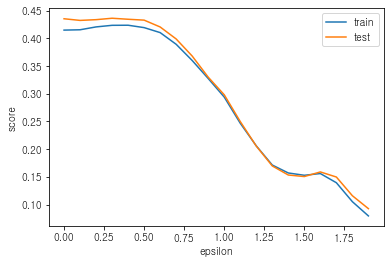

In [6]:
# epsilon
s_train=[]
s_test=[]
for i in np.arange(0.0,2.0,0.1):
    svr_lin = SVR(kernel='rbf', C=1.0, epsilon=i).fit(X_std_train,y_std_train)
    s_train.append(svr_lin.score(X_std_train,y_std_train))
    s_test.append(svr_lin.score(X_std_test,y_std_test))
plt.plot(np.arange(0.0,2.0,0.1),s_train,label='train')
plt.plot(np.arange(0.0,2.0,0.1),s_test, label='test')
plt.xlabel('epsilon')
plt.ylabel('score')
plt.legend()
plt.show()

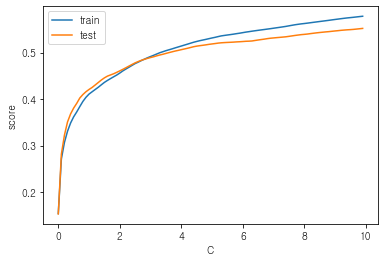

In [7]:
# 규제 
s_train=[]
s_test=[]
for i in np.arange(0.01,10.0,0.1):
    svr_lin = SVR(kernel='rbf', C=i, epsilon=0.6).fit(X_std_train,y_std_train)
    s_train.append(svr_lin.score(X_std_train,y_std_train))
    s_test.append(svr_lin.score(X_std_test,y_std_test))
plt.plot(np.arange(0.0,10.0,0.1),s_train,label='train')
plt.plot(np.arange(0.0,10.0,0.1),s_test, label='test')
plt.xlabel('C')
plt.ylabel('score')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_std_train, y_train_pred)
mse = mean_squared_error(y_std_test, y_test_pred)

print(train_mse, mse)

0.5711532082074627 0.5543609186768712
